In [1]:
%ls

'#logistic-regression-numpy.ipynb'*   lib/
 Components.ipynb                     models/
 Dockerfile*                          neural_net/
 MLP.ipynb                            pure_numpy_clean.ipynb*
 ModelGraph.html                      readme.md*
'OLS with tf.ipynb'*                  run.ipynb
 active_funcs.ipynb                   run.py*
 autodiff_reverse_mode.jpeg*          tf_logs/
 data/


In [1]:
import neural_net

# Initialization

## Linear Layer

In [3]:
 fc = neural_net.layers.fullyconnected(n_in=2,n_out=6)

In [4]:
str(fc)

'fullyconnected'

In [5]:
fc.id

{'id': 140018824533328,
 'type': 'fullyconnected',
 'self': <neural_net.layers.fullyconnected at 0x7f58ac4c5550>,
 'n_in': 2,
 'n_out': 6,
 'init_method': <function neural_net.init_funcs.zeros(n_in, n_out=None, k=1)>}

In [6]:
fc.outfuncs

## Linear neuron

In [7]:
linear_neuron = fc.outfuncs[0]
linear_neuron

In [8]:
str(linear_neuron)

'Linear'

In [9]:
linear_neuron.id

{'id': 140018826324944,
 'type': 'Linear',
 'self': <neural_net.activation_funcs.Σ at 0x7f58ac67abd0>,
 'layer': {'id': 140018824533328,
  'type': 'fullyconnected',
  'self': <neural_net.layers.fullyconnected at 0x7f58ac4c5550>,
  'n_in': 2,
  'n_out': 6,
  'init_method': <function neural_net.init_funcs.zeros(n_in, n_out=None, k=1)>}}

In [10]:
linear_neuron.w.shape

(3, 1)

## activation layer

In [11]:
al = neural_net.layers.activation(n_in=6,func=neural_net.activation_funcs.σ)

In [12]:
al.outfuncs

In [13]:
str(al)

'activation'

## sigmoid neuron

In [14]:
sigmoid = al.outfuncs[0]
sigmoid

In [15]:
str(sigmoid)

'sigmoid'

In [16]:
sigmoid.id

{'id': 140018826326608,
 'type': 'sigmoid',
 'self': <neural_net.activation_funcs.σ at 0x7f58ac67b250>,
 'layer': {'id': 140018056679056,
  'type': 'activation',
  'self': <neural_net.layers.activation at 0x7f587e87ce90>,
  'n_in': 6,
  'func': neural_net.activation_funcs.σ,
  'n_out': 6}}

## Architecture

In [17]:
network = neural_net.architecture.Sequential(
        [
        neural_net.layers.fullyconnected(n_in=2,n_out=10),
        neural_net.layers.activation(n_in=10,func=neural_net.activation_funcs.σ),
        neural_net.layers.fullyconnected(n_in=10,n_out=1),
        neural_net.layers.activation(n_in=1,func=neural_net.activation_funcs.σ)
        ]
    ,cost_func=neural_net.loss.binaryCrossEntropy)

In [18]:
network.steps

In [19]:
network.cost_func

neural_net.loss.binaryCrossEntropy

## db

In [32]:
network.db_path

'/home/analyst/notebooks/neural_net/run/model20240221211727.db'

In [21]:
neural_net.db.DBmanager.con

In [22]:
cursor = neural_net.db.DBmanager.con.cursor()

In [23]:
%ls  neural_net/run/*db

neural_net/run/model20240221154635.db  neural_net/run/model20240221211727.db


In [24]:
import pandas
res = cursor.execute('''

        SELECT * 
        FROM
        sqlite_schema

''')
pandas.DataFrame(res.fetchall(),columns=map(lambda x : x[0],res.description))

,type,name,tbl_name,rootpage,sql
0,table,Neurons,Neurons,2,CREATE TABLE Neurons(\n id INTEGER PRIMARY KE...
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,Layers,Layers,4,CREATE TABLE Layers(\n id INTEGER PRIMARY KEY...
3,table,Weights,Weights,5,CREATE TABLE Weights(\n id INTEGER PRIMARY KE...


# Predicting

In [25]:
import numpy
X = numpy.random.uniform(-1,1,size=(100,2))

## Linear Layer

In [26]:
network.steps[0]

### Feeding data to input layer

In [27]:
network.steps[0].In = [(id(X),X)]

In [28]:
network.steps[0].In

{140017877738832: array([[ 0.24691704, -0.58808225],
        [ 0.47024566, -0.36321633],
        [-0.27930158,  0.01008514],
        [-0.1428256 , -0.85472078],
        [-0.9644579 , -0.09147275],
        [ 0.23401077,  0.77613934],
        [-0.87989081,  0.60360851],
        [ 0.42741863,  0.84393297],
        [ 0.05907416, -0.07513048],
        [-0.7145097 , -0.89421152],
        [ 0.00280053, -0.33122428],
        [-0.36747703, -0.69980883],
        [ 0.86352003,  0.04620932],
        [-0.92376854, -0.3703736 ],
        [-0.40057645,  0.35399648],
        [-0.07498421, -0.08148707],
        [-0.69345752,  0.83374164],
        [ 0.69785705,  0.39945978],
        [-0.39812522,  0.21648489],
        [ 0.45062825,  0.86515217],
        [-0.84369275,  0.0769757 ],
        [ 0.79310002, -0.36296566],
        [-0.39163932,  0.4978864 ],
        [-0.69098011, -0.90386196],
        [-0.95851154, -0.09116982],
        [-0.76953541,  0.09059275],
        [-0.65544836,  0.30223838],
        [ 0

In [29]:
network.steps[0].outfuncs

In [30]:
network.steps[0].outfuncs[0]

In [31]:
network.steps[0].outfuncs[0].In

((140017877738832,),
 array([[ 0.24691704, -0.58808225],
        [ 0.47024566, -0.36321633],
        [-0.27930158,  0.01008514],
        [-0.1428256 , -0.85472078],
        [-0.9644579 , -0.09147275],
        [ 0.23401077,  0.77613934],
        [-0.87989081,  0.60360851],
        [ 0.42741863,  0.84393297],
        [ 0.05907416, -0.07513048],
        [-0.7145097 , -0.89421152],
        [ 0.00280053, -0.33122428],
        [-0.36747703, -0.69980883],
        [ 0.86352003,  0.04620932],
        [-0.92376854, -0.3703736 ],
        [-0.40057645,  0.35399648],
        [-0.07498421, -0.08148707],
        [-0.69345752,  0.83374164],
        [ 0.69785705,  0.39945978],
        [-0.39812522,  0.21648489],
        [ 0.45062825,  0.86515217],
        [-0.84369275,  0.0769757 ],
        [ 0.79310002, -0.36296566],
        [-0.39163932,  0.4978864 ],
        [-0.69098011, -0.90386196],
        [-0.95851154, -0.09116982],
        [-0.76953541,  0.09059275],
        [-0.65544836,  0.30223838],
       

### Db layers

In [32]:
%pwd

'/home/analyst/notebooks'

In [33]:
%load_ext sql
#%sql sqlite:///neural_net/run/model20240221130605.db

In [34]:
%%sql   

SELECT * 
FROM layers

 * sqlite:///neural_net/run/model20240221130605.db
Done.


id,layer_id,n_out,created_at,updated_at,type
1,139673612221968,10,2024-02-21 13:06:30,2024-02-21 13:06:30,fullyconnected


### Neurons

In [35]:
%%sql

SELECT * 
        FROM
        neurons


 * sqlite:///neural_net/run/model20240221130605.db
Done.


id,neuron_id,n_in,layer_id,created_at,updated_at,type
1,139673552776976,2,139673612221968,2024-02-21 13:06:30,2024-02-21 13:06:30,Linear
2,139673142045584,2,139673612221968,2024-02-21 13:06:30,2024-02-21 13:06:30,Linear
3,139672800498192,2,139673612221968,2024-02-21 13:06:30,2024-02-21 13:06:30,Linear
4,139672800498640,2,139673612221968,2024-02-21 13:06:30,2024-02-21 13:06:30,Linear
5,139672800498448,2,139673612221968,2024-02-21 13:06:30,2024-02-21 13:06:30,Linear
6,139672800498704,2,139673612221968,2024-02-21 13:06:30,2024-02-21 13:06:30,Linear
7,139672800498832,2,139673612221968,2024-02-21 13:06:30,2024-02-21 13:06:30,Linear
8,139672800498896,2,139673612221968,2024-02-21 13:06:30,2024-02-21 13:06:30,Linear
9,139672800498960,2,139673612221968,2024-02-21 13:06:30,2024-02-21 13:06:30,Linear
10,139672800498768,2,139673612221968,2024-02-21 13:06:30,2024-02-21 13:06:30,Linear


### Weights

In [36]:
%%sql

SELECT * 
FROM
weights


 * sqlite:///neural_net/run/model20240221130605.db
Done.


id,weight_id,neuron_id,created_at,updated_at,value
1,0,139673552776976,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
2,1,139673552776976,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
3,2,139673552776976,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
4,0,139673142045584,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
5,1,139673142045584,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
6,2,139673142045584,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
7,0,139672800498192,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
8,1,139672800498192,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
9,2,139672800498192,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
10,0,139672800498640,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0


### Predictions

In [37]:
len(network.steps[0].eval())

10

In [38]:
network.steps[0].out[0][1].shape

(100, 1)

## Activation Layer

In [39]:
network.steps[1].In = network.steps[0].out

In [40]:
%%sql
SELECT * from layers

 * sqlite:///neural_net/run/model20240221130605.db
Done.


id,layer_id,n_out,created_at,updated_at,type
1,139673612221968,10,2024-02-21 13:06:30,2024-02-21 13:06:30,fullyconnected
2,139672800499024,10,2024-02-21 13:07:14,2024-02-21 13:07:14,activation


In [41]:
len(network.steps[1].In)

10

In [42]:
network.steps[1].outfuncs

In [43]:
network.steps[1].outfuncs[0]

In [44]:
network.steps[1].outfuncs[0].In

(139672680531696,
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
  

In [45]:
network.steps[1].outfuncs[0].In[1].shape

(100, 1)

In [46]:
len(network.steps[1])

10

In [47]:
len(network.steps[1].eval())

10

In [48]:
%%sql 
Select * from neurons where type='sigmoid'

 * sqlite:///neural_net/run/model20240221130605.db
Done.


id,neuron_id,n_in,layer_id,created_at,updated_at,type
11,139672800499088,1,139672800499024,2024-02-21 13:07:14,2024-02-21 13:07:14,sigmoid
12,139672800499152,1,139672800499024,2024-02-21 13:07:14,2024-02-21 13:07:14,sigmoid
13,139672800499216,1,139672800499024,2024-02-21 13:07:14,2024-02-21 13:07:14,sigmoid
14,139672800499280,1,139672800499024,2024-02-21 13:07:14,2024-02-21 13:07:14,sigmoid
15,139672800499408,1,139672800499024,2024-02-21 13:07:14,2024-02-21 13:07:14,sigmoid
16,139672800499600,1,139672800499024,2024-02-21 13:07:14,2024-02-21 13:07:14,sigmoid
17,139672800499728,1,139672800499024,2024-02-21 13:07:14,2024-02-21 13:07:14,sigmoid
18,139672800499856,1,139672800499024,2024-02-21 13:07:14,2024-02-21 13:07:14,sigmoid
19,139672800499984,1,139672800499024,2024-02-21 13:07:14,2024-02-21 13:07:14,sigmoid
20,139672800499536,1,139672800499024,2024-02-21 13:07:14,2024-02-21 13:07:14,sigmoid


In [49]:
%%sql
Select count(*) as nb_weights from weights 

 * sqlite:///neural_net/run/model20240221130605.db
Done.


nb_weights
30


In [50]:
network.steps[1].outfuncs[0].eval()

(139672680545328,
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
       

In [51]:
len(network.steps[1].out)

10

## Second Linear Layer

In [52]:
network.steps[2].In = network.steps[1].out

In [53]:
len(network.steps[2].In)

10

In [54]:
network.steps[2].outfuncs

In [55]:
%%sql

SELECT * 
FROM
layers


 * sqlite:///neural_net/run/model20240221130605.db
Done.


id,layer_id,n_out,created_at,updated_at,type
1,139673612221968,10,2024-02-21 13:06:30,2024-02-21 13:06:30,fullyconnected
2,139672800499024,10,2024-02-21 13:07:14,2024-02-21 13:07:14,activation
3,139672800500304,1,2024-02-21 13:07:35,2024-02-21 13:07:35,fullyconnected


In [56]:
network.steps[2].outfuncs[0].In[1].shape

(100, 10)

In [57]:
len(network.steps[2].eval())

1

In [59]:
%%sql
SELECT * from neurons where layer_id = 139672800500304

 * sqlite:///neural_net/run/model20240221130605.db
Done.


id,neuron_id,n_in,layer_id,created_at,updated_at,type
21,139672800500368,10,139672800500304,2024-02-21 13:07:35,2024-02-21 13:07:35,Linear


In [60]:
%%sql
SELECT * from weights where neuron_id = 139672800500368

 * sqlite:///neural_net/run/model20240221130605.db
Done.


id,weight_id,neuron_id,created_at,updated_at,value
31,0,139672800500368,2024-02-21 13:07:35,2024-02-21 13:07:35,0.0
32,1,139672800500368,2024-02-21 13:07:35,2024-02-21 13:07:35,0.0
33,2,139672800500368,2024-02-21 13:07:35,2024-02-21 13:07:35,0.0
34,3,139672800500368,2024-02-21 13:07:35,2024-02-21 13:07:35,0.0
35,4,139672800500368,2024-02-21 13:07:35,2024-02-21 13:07:35,0.0
36,5,139672800500368,2024-02-21 13:07:35,2024-02-21 13:07:35,0.0
37,6,139672800500368,2024-02-21 13:07:35,2024-02-21 13:07:35,0.0
38,7,139672800500368,2024-02-21 13:07:35,2024-02-21 13:07:35,0.0
39,8,139672800500368,2024-02-21 13:07:35,2024-02-21 13:07:35,0.0
40,9,139672800500368,2024-02-21 13:07:35,2024-02-21 13:07:35,0.0


In [61]:
%%sql
SELECT COUNT(*) from weights

 * sqlite:///neural_net/run/model20240221130605.db
Done.


COUNT(*)
41


## Output Layer

In [62]:
network.steps[3].In = network.steps[2].out

In [63]:
network.steps[3].eval()

[(139672680545520,
  array([[0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
     

In [64]:
%%sql
SELECT * from layers

 * sqlite:///neural_net/run/model20240221130605.db
Done.


id,layer_id,n_out,created_at,updated_at,type
1,139673612221968,10,2024-02-21 13:06:30,2024-02-21 13:06:30,fullyconnected
2,139672800499024,10,2024-02-21 13:07:14,2024-02-21 13:07:14,activation
3,139672800500304,1,2024-02-21 13:07:35,2024-02-21 13:07:35,fullyconnected
4,139672800500560,1,2024-02-21 13:07:59,2024-02-21 13:07:59,activation


In [65]:
%%sql
SELECT COUNT(*) from weights

 * sqlite:///neural_net/run/model20240221130605.db
Done.


COUNT(*)
41


## Predict Method

In [66]:
network.predict(X)

[(139672680307216,
  array([[0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
     

# Linearly seperable target variable

In [4]:
import matplotlib.pyplot as plt
import numpy

In [5]:
X = numpy.random.uniform(-1,1,size=(100,2))
y = (X.sum(axis=1) < numpy.random.uniform(.3,.37,(len(X),))).reshape(-1,1)+0


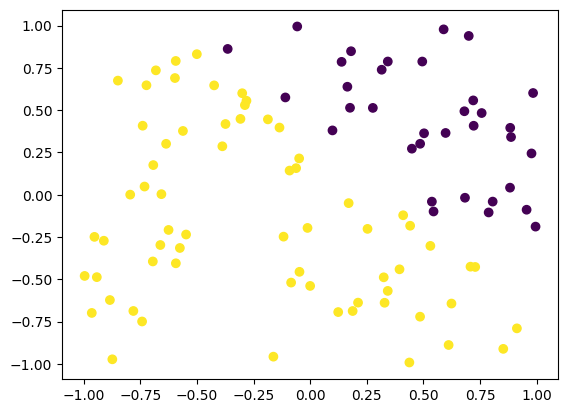

In [6]:
plt.scatter(x=X[:,0],y=X[:,1],c=y)

# Visualizing Network

In [109]:
neural_net.	architecture.GraphManager

neural_net.utils.GraphManager

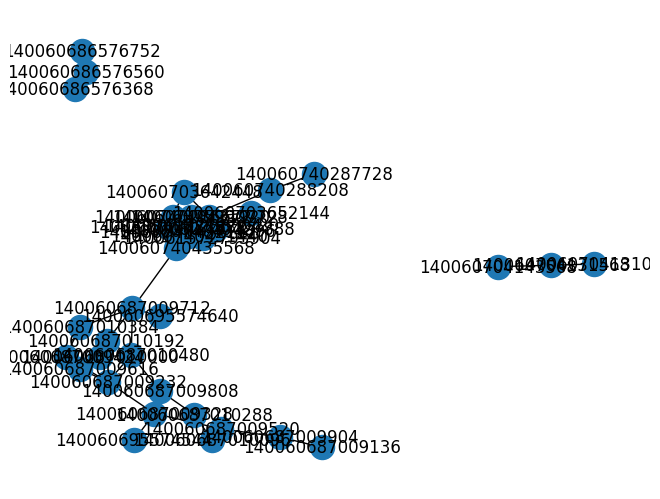

In [110]:
neural_net.	architecture.GraphManager.draw()

In [72]:
neural_net.	architecture.GraphManager.draw(engine='pyviz',params={'notebook':True})

ModelGraph.html


# Cost func

In [73]:
pred = network.predict(X)
pred

[(139672680539088,
  array([[0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
     

In [74]:
Cost = neural_net.loss.binaryCrossEntropy(y,pred)
Cost

In [75]:
Cost.eval()

0.6931471805599453

In [76]:
Cost.prime()

array([[ 0.02],
       [-0.02],
       [ 0.02],
       [ 0.02],
       [ 0.02],
       [-0.02],
       [ 0.02],
       [ 0.02],
       [-0.02],
       [-0.02],
       [-0.02],
       [ 0.02],
       [-0.02],
       [-0.02],
       [ 0.02],
       [ 0.02],
       [-0.02],
       [ 0.02],
       [-0.02],
       [ 0.02],
       [-0.02],
       [-0.02],
       [-0.02],
       [-0.02],
       [-0.02],
       [ 0.02],
       [-0.02],
       [ 0.02],
       [ 0.02],
       [ 0.02],
       [-0.02],
       [ 0.02],
       [ 0.02],
       [-0.02],
       [-0.02],
       [ 0.02],
       [ 0.02],
       [-0.02],
       [ 0.02],
       [-0.02],
       [ 0.02],
       [ 0.02],
       [-0.02],
       [-0.02],
       [ 0.02],
       [ 0.02],
       [-0.02],
       [-0.02],
       [-0.02],
       [ 0.02],
       [-0.02],
       [ 0.02],
       [-0.02],
       [ 0.02],
       [-0.02],
       [-0.02],
       [-0.02],
       [-0.02],
       [-0.02],
       [ 0.02],
       [-0.02],
       [-0.02],
       [

# Backpropagation

## Learning rate

In [111]:
α = .003
α

0.003

In [ ]:
network.steps[-1].outfuncs[0].outid

## Output Layer

In [80]:
network.steps[-1].update({139672680539088:y},α)

{139672680532752: array([[0.  ],
        [0.25],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.25],
        [0.  ],
        [0.  ],
        [0.25],
        [0.25],
        [0.25],
        [0.  ],
        [0.25],
        [0.25],
        [0.  ],
        [0.  ],
        [0.25],
        [0.  ],
        [0.25],
        [0.  ],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.  ],
        [0.25],
        [0.  ],
        [0.  ],
        [0.  ],
        [0.25],
        [0.  ],
        [0.  ],
        [0.25],
        [0.25],
        [0.  ],
        [0.  ],
        [0.25],
        [0.  ],
        [0.25],
        [0.  ],
        [0.  ],
        [0.25],
        [0.25],
        [0.  ],
        [0.  ],
        [0.25],
        [0.25],
        [0.25],
        [0.  ],
        [0.25],
        [0.  ],
        [0.25],
        [0.  ],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.25],
        [0.  ],
        [0.25],
       

In [82]:
Δ = network.steps[-1].update({139672680539088:y},α)

## Last Linear Layer

In [83]:
network.steps[-2]

In [84]:
len(network.steps[-2].In)

10

In [85]:
list(network.steps[-2].In.values())[0].shape

(100, 1)

In [86]:
network.steps[-2].In.values()

dict_values([array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       

In [87]:
len(network.steps[-2].outfuncs)

1

In [88]:
Δ = network.steps[-2].update(Δ,α)
Δ

{139672680543312: array([0.06125]),
 139672680543696: array([0.06125]),
 139672680542736: array([0.06125]),
 139672680540816: array([0.06125]),
 139672680540720: array([0.06125]),
 139672680540336: array([0.06125]),
 139672680540528: array([0.06125]),
 139672680540240: array([0.06125]),
 139672680540144: array([0.06125]),
 139672680532560: array([0.06125])}

In [89]:
%%sql
SELECT * 
FROM
weights


 * sqlite:///neural_net/run/model20240221130605.db
Done.


id,weight_id,neuron_id,created_at,updated_at,value
1,0,139673552776976,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
2,1,139673552776976,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
3,2,139673552776976,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
4,0,139673142045584,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
5,1,139673142045584,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
6,2,139673142045584,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
7,0,139672800498192,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
8,1,139672800498192,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
9,2,139672800498192,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
10,0,139672800498640,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0


## First activation layer

In [90]:
network.steps[-3]

In [91]:
len(network.steps[-3].In)

10

In [92]:
network.steps[-3].out

[(139672680543312,
  array([[0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
         [0.5],
     

In [93]:
Δ = network.steps[-3].update(Δ,α)
Δ

{139672547837776: array([[0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.0153125],
        [0.015312

## First input layer

In [94]:
Δ = network.steps[-4].update(Δ,α)

## Update method

In [95]:
network.update({139672680539088:y},α)

In [96]:
%%sql
SELECT *
from weights

 * sqlite:///neural_net/run/model20240221130605.db
Done.


id,weight_id,neuron_id,created_at,updated_at,value
1,0,139673552776976,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
2,1,139673552776976,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
3,2,139673552776976,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
4,0,139673142045584,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
5,1,139673142045584,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
6,2,139673142045584,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
7,0,139672800498192,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
8,1,139672800498192,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
9,2,139672800498192,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0
10,0,139672800498640,2024-02-21 13:06:30,2024-02-21 13:06:30,0.0


## Logistic Regression

In [8]:
import matplotlib.pyplot as plt
import numpy
import neural_net

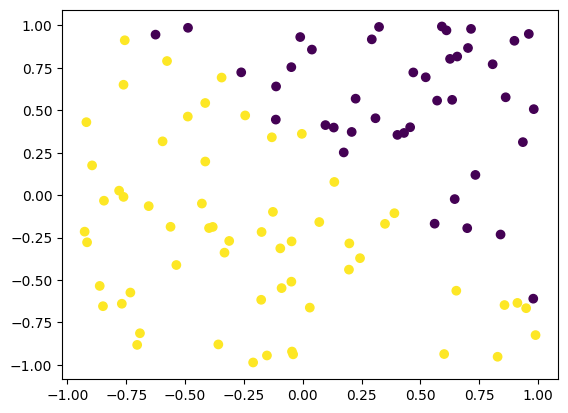

In [9]:
X = numpy.random.uniform(-1,1,size=(100,2))
y = (X.sum(axis=1) < numpy.random.uniform(.3,.37,(len(X),))).reshape(-1,1)+0
plt.scatter(x=X[:,0],y=X[:,1],c=y)

In [10]:
logreg = neural_net.architecture.Sequential(
        [
        neural_net.layers.fullyconnected(n_in=2,n_out=1),
        neural_net.layers.activation(n_in=1,n_out=1,func=neural_net.activation_funcs.σ)
        ],
    cost_func= neural_net.loss.binaryCrossEntropy
    )
_,h = logreg.eval(X)[0]

## Analytic gradient
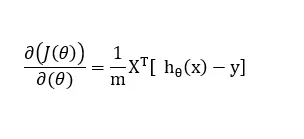

In [10]:
Xconst = numpy.c_[X,numpy.ones((len(X),1))]
J = 1/len(Xconst)*Xconst.T.dot(h-y)
J

array([[ 0.15499811],
       [ 0.16024959],
       [-0.11      ]])

## Chain rule logistic Regression

In [11]:
%%HTML
  <iframe
      src="https://web.stanford.edu/class/archive/cs/cs109/cs109.1192/lectureNotes/25%20-%20LogisticRegression.pdf"
      width="100%"
      height="600px"
      loading="lazy"
      title="PDF-file"
  ></iframe>



In [12]:
p = logreg.eval(X)

In [13]:
grad0 = logreg.cost_func(y,p).prime()
grad0.shape

(100, 1)

In [14]:
grad1 = logreg.steps[-1].update({logreg.outid:grad0})

In [15]:
grad2 = logreg.steps[-2].update(grad1)

In [16]:
grad2

{139840144482128: array([[ 0.15499811],
        [ 0.16024959],
        [-0.11      ]])}

## Softmax analytical gradient

In [17]:
y_one_hot = neural_net.utils.onehot(y)
y_one_hot

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0,

In [18]:
W = numpy.zeros((X.shape[1]+1,2))
W

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [19]:
W = numpy.zeros((X.shape[1]+1,2))
Softmax = lambda W,X : numpy.exp(X.dot(W))/numpy.exp(X.dot(W)).sum(axis=1).reshape(-1,1)
Softmax(W,Xconst)

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5,

In [20]:
J = 1/len(Xconst)*Xconst.T.dot(Softmax(W,Xconst)-y_one_hot)
J

array([[-0.15499811,  0.15499811],
       [-0.16024959,  0.16024959],
       [ 0.11      , -0.11      ]])

## Sotfmax chain rule

In [21]:
softmax = neural_net.architecture.Sequential(
        [
        neural_net.layers.fullyconnected(n_in=2,n_out=2),
        neural_net.layers.activation(n_in=2,n_out=1,func=neural_net.activation_funcs.Softmax)
        ],
    cost_func= neural_net.loss.CrossEntropy
    )
p = softmax.eval(X)

In [22]:
p

[(139839089395344,
  array([[0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 

In [23]:
grad0 = softmax.cost_func(y_one_hot,p).prime()
grad0.shape

(100, 2)

In [24]:
grad1 = softmax.steps[-1].update({softmax.outid:grad0})

In [25]:
grad2 = softmax.steps[-2].update(grad1)

In [26]:
softmax.steps[-2].outfuncs[0].Δ

array([[-0.15499811],
       [-0.16024959],
       [ 0.11      ]])

In [27]:
softmax.steps[-2].outfuncs[1].Δ

array([[ 0.15499811],
       [ 0.16024959],
       [-0.11      ]])

# Training

## Using analytical gradient

In [28]:
n_epoch = 1000

Xconst = numpy.c_[X,numpy.ones((len(X),1))]

sigmoid = lambda w,X : (1/(1+numpy.exp(-X.dot(w)))).reshape(-1,1)


In [29]:
w = numpy.zeros((X.shape[1]+1,1))

In [30]:
for _ in range(n_epoch):
    w -= 1/len(Xconst)*Xconst.T.dot(sigmoid(w,Xconst)-y)

In [31]:
w

array([[-9.41484745],
       [-9.99862286],
       [ 2.92457294]])

In [32]:
pred = (sigmoid(w,Xconst) > .5 )+0

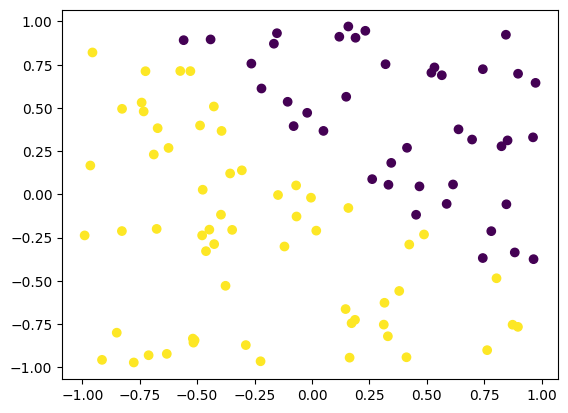

In [33]:
plt.scatter(x=X[:,0],y=X[:,1],c=pred)

## Using chain rule

In [34]:
logreg = neural_net.architecture.Sequential(
        [
        neural_net.layers.fullyconnected(n_in=2,n_out=1),
        neural_net.layers.activation(n_in=1,n_out=1,func=neural_net.activation_funcs.σ)
        ],
    cost_func= neural_net.loss.binaryCrossEntropy
    )

In [35]:
for _ in range(1000):
    p = logreg.eval(X)
    grad0 = logreg.cost_func(y,p).prime()
    grad1 = logreg.steps[-1].update({logreg.outid:grad0})
    grad2 = logreg.steps[-2].update(grad1)


In [36]:
logreg.steps[-2].outfuncs[0].w

array([[-9.41484745],
       [-9.99862286],
       [ 2.92457294]])

In [37]:
_,p = logreg.eval(X)[0]

In [38]:
p = (p>.5)+0

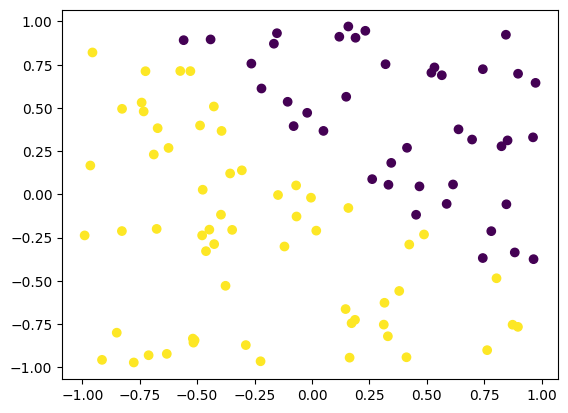

In [39]:
plt.scatter(x=X[:,0],y=X[:,1],c=p)

## Using train method

In [40]:
from importlib import reload

In [41]:
reload(neural_net.architecture)

<module 'neural_net.architecture' from '/home/analyst/notebooks/neural_net/architecture.py'>

In [42]:
logreg = neural_net.architecture.Sequential(
        [
        neural_net.layers.fullyconnected(n_in=2,n_out=1),
        neural_net.layers.activation(n_in=1,n_out=1,func=neural_net.activation_funcs.σ)
        ],
    cost_func= neural_net.loss.binaryCrossEntropy
    )

In [43]:
logreg.train(X,y,n_epochs=1000)

In [44]:
logreg.steps[-2].outfuncs[0].w

array([[-9.41484745],
       [-9.99862286],
       [ 2.92457294]])

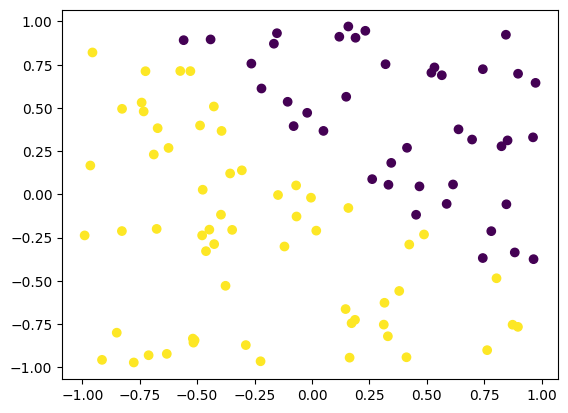

In [45]:
_,p = logreg.eval(X)[0]
p = (p>.5)+0
plt.scatter(x=X[:,0],y=X[:,1],c=p)

## Using Softmax analytical solution

In [46]:
W = numpy.zeros((X.shape[1]+1,2))
Softmax = lambda W,X : numpy.exp(X.dot(W))/numpy.exp(X.dot(W)).sum(axis=1).reshape(-1,1)


for _ in range(1000):
    W -= 1/len(Xconst)*Xconst.T.dot(Softmax(W,Xconst)-y_one_hot)

In [47]:
W

array([[ 5.97032249, -5.97032249],
       [ 6.34987439, -6.34987439],
       [-1.89076453,  1.89076453]])

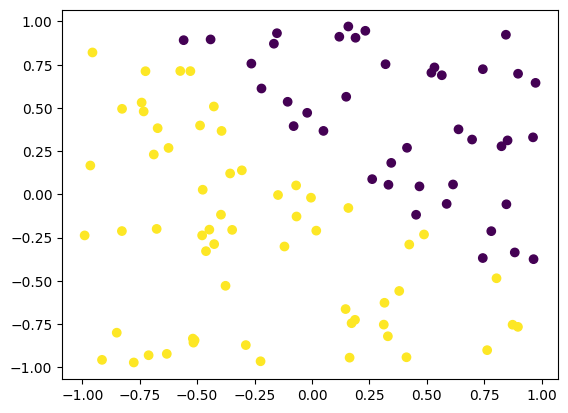

In [48]:
p = Softmax(W,Xconst).argmax(axis=1)
plt.scatter(x=X[:,0],y=X[:,1],c=p)

## Softmax chain rule

In [49]:
softmax = neural_net.architecture.Sequential(
        [
        neural_net.layers.fullyconnected(n_in=2,n_out=2),
        neural_net.layers.activation(n_in=2,n_out=1,func=neural_net.activation_funcs.Softmax)
        ],
    cost_func= neural_net.loss.CrossEntropy
    )

In [50]:
for _ in range(1000):
    p = softmax.eval(X)
    grad0 = softmax.cost_func(y_one_hot,p).prime()
    grad1 = softmax.steps[-1].update({softmax.outid:grad0})
    grad2 = softmax.steps[-2].update(grad1)

In [51]:
softmax.steps[-2].outfuncs[0].w

array([[ 5.97032249],
       [ 6.34987439],
       [-1.89076453]])

In [52]:
softmax.steps[-2].outfuncs[1].w

array([[-5.97032249],
       [-6.34987439],
       [ 1.89076453]])

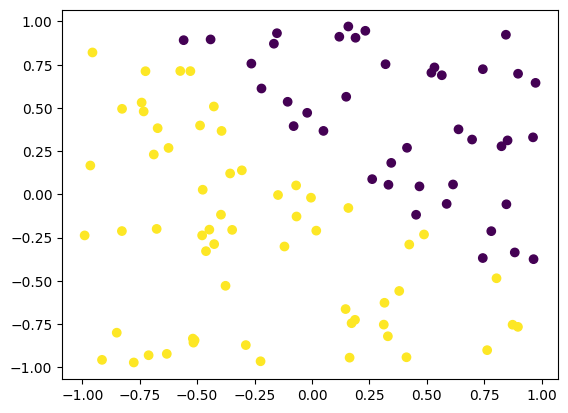

In [53]:
p = softmax.eval(X)[0][1].argmax(axis=1)
plt.scatter(x=X[:,0],y=X[:,1],c=p)

## Neural Network

In [1]:
from neural_net import *

In [13]:
import pandas
ix = pandas.DataFrame(X).sample(frac=1).index.tolist()
X,y = X[ix,:],y[ix,:]

In [16]:
init_method =lambda _in,out: utils.numpy.random.uniform(-1./out**.5, 1/out**.5, (_in+1,1))


ann = architecture.Sequential(
        [
        layers.fullyconnected(n_in=2,n_out=50,init_method=init_method),
        layers.activation(n_in=50,n_out=50,func=activation_funcs.LeakyReLU),
        
            
        layers.fullyconnected(n_in=50,n_out=2,init_method=init_method),
        layers.activation(n_in=2,n_out=1,func=activation_funcs.Softmax)
        ],
    cost_func= loss.CrossEntropy
    )
ann.eval(X)

[(139853062214192,
  array([[0.47743269, 0.52256731],
         [0.58038836, 0.41961164],
         [0.50145736, 0.49854264],
         [0.45820408, 0.54179592],
         [0.59014507, 0.40985493],
         [0.57868714, 0.42131286],
         [0.57892547, 0.42107453],
         [0.51549418, 0.48450582],
         [0.53105509, 0.46894491],
         [0.49206825, 0.50793175],
         [0.66213452, 0.33786548],
         [0.43062779, 0.56937221],
         [0.48656787, 0.51343213],
         [0.57801224, 0.42198776],
         [0.48295762, 0.51704238],
         [0.64667813, 0.35332187],
         [0.45581497, 0.54418503],
         [0.52876891, 0.47123109],
         [0.58713698, 0.41286302],
         [0.52171966, 0.47828034],
         [0.58241627, 0.41758373],
         [0.61106237, 0.38893763],
         [0.46046283, 0.53953717],
         [0.46573025, 0.53426975],
         [0.51735595, 0.48264405],
         [0.5234707 , 0.4765293 ],
         [0.40994404, 0.59005596],
         [0.55743328, 0.44256672],
 

In [17]:
ann.train(
    neural_net.utils.scaler(X),
        neural_net.utils.onehot(y),n_epochs=100,batch_size=100, α=1,metrics=neural_net.metrics.accuracy)

epoch 0 CrossEntropy 0.7132396264770307 accuracy 0.61
epoch 1 CrossEntropy 0.2811850447306714 accuracy 0.94
epoch 2 CrossEntropy 0.2210686235321865 accuracy 0.95
epoch 3 CrossEntropy 0.19091850312234115 accuracy 0.95
epoch 4 CrossEntropy 0.17088954172793427 accuracy 0.96
epoch 5 CrossEntropy 0.15759555713006138 accuracy 0.96
epoch 6 CrossEntropy 0.14698347809929746 accuracy 0.96
epoch 7 CrossEntropy 0.13944086623430924 accuracy 0.96
epoch 8 CrossEntropy 0.13316120973045031 accuracy 0.96
epoch 9 CrossEntropy 0.12781228095992983 accuracy 0.96
epoch 10 CrossEntropy 0.12332735194930297 accuracy 0.96
epoch 11 CrossEntropy 0.11954374119819093 accuracy 0.96
epoch 12 CrossEntropy 0.11626966037139833 accuracy 0.96
epoch 13 CrossEntropy 0.11335142614074449 accuracy 0.96
epoch 14 CrossEntropy 0.11071734209718884 accuracy 0.96
epoch 15 CrossEntropy 0.10827650320064139 accuracy 0.96
epoch 16 CrossEntropy 0.10597549731960433 accuracy 0.96
epoch 17 CrossEntropy 0.10387810799759309 accuracy 0.96
epoch

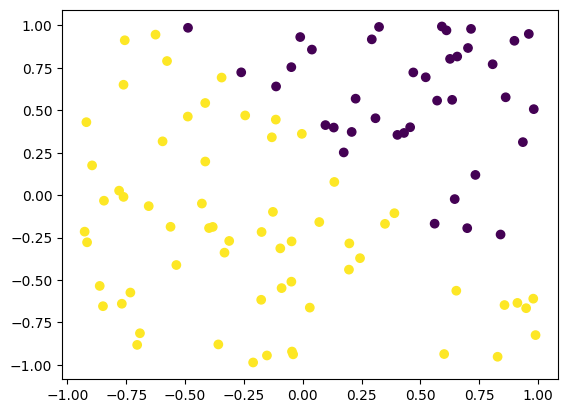

In [18]:
p = ann.eval(X)[0][1].argmax(axis=1)
plt.scatter(x=X[:,0],y=X[:,1],c=p)

# Non linear data

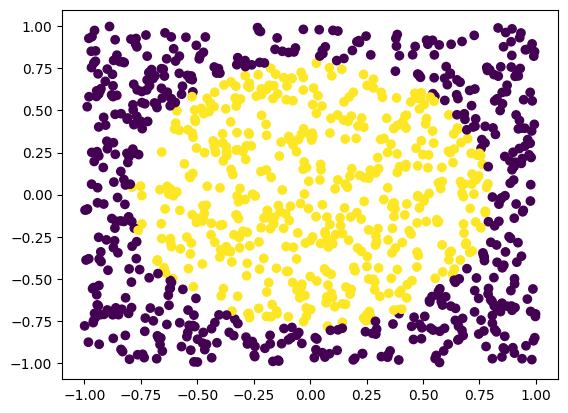

In [2]:
import numpy
import matplotlib.pyplot as plt
X = numpy.random.uniform(-1, 1, (1000, 2))
y =( (X[:, 0]**2 + X[:, 1]**2)/numpy.pi < 0.2).reshape(-1,1)+0
plt.scatter(x=X[:,0],y=X[:,1],c=y)

## Using analytical logistic regression

In [22]:
#%%timeit
Xconst = numpy.c_[X,numpy.ones((len(X),1))]

sigmoid = lambda w,X : (1/(1+numpy.exp(-X.dot(w)))).reshape(-1,1)

w = numpy.zeros((X.shape[1]+1,1))

n_epoch = 10000

for _ in range(n_epoch):
    w -= 1/len(Xconst)*Xconst.T.dot(sigmoid(w,Xconst)-y)

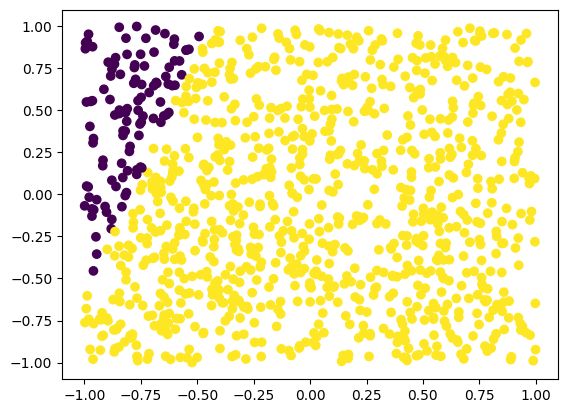

In [23]:
p = sigmoid(w,Xconst)>.5
plt.scatter(x=X[:,0],y=X[:,1],c=p)

## Using Train method

* 1.75 s ± 131 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)* 1.84 s ± 110 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
logreg =architecture.Sequential(
        [
        layers.fullyconnected(n_in=2,n_out=1,store=False),
        layers.activation(n_in=1,n_out=1,func=activation_funcs.σ,store=False)
        ],
    cost_func= loss.binaryCrossEntropy
    )

In [25]:
%%timeit
logreg.train(X,y,n_epochs=100)
_,p = logreg.eval(X)[0]


1.92 s ± 234 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


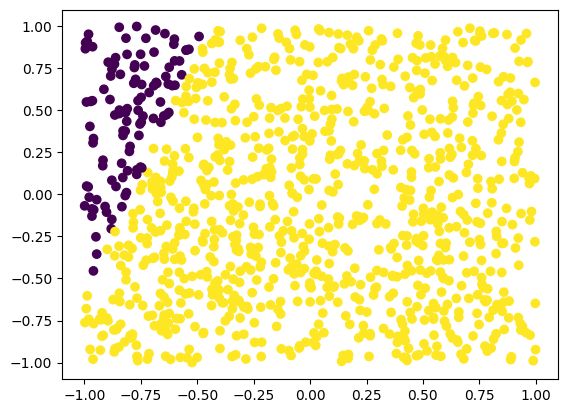

In [26]:
p = p>.5
plt.scatter(x=X[:,0],y=X[:,1],c=p)

## Using analytical softmax

In [27]:
W = numpy.zeros((X.shape[1]+1,2))
Softmax = lambda W,X : numpy.exp(X.dot(W))/numpy.exp(X.dot(W)).sum(axis=1).reshape(-1,1)


for _ in range(10000):
    W -= 1/len(Xconst)*Xconst.T.dot(Softmax(W,Xconst)-utils.onehot(y))

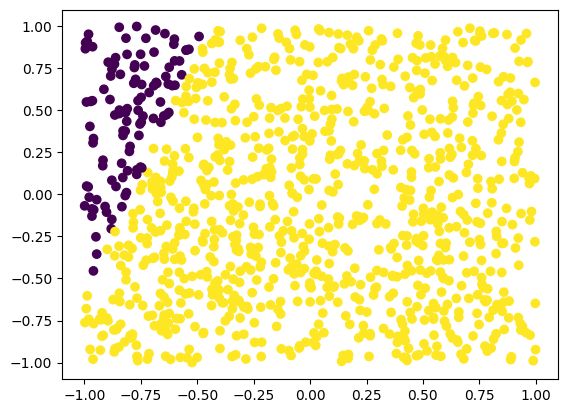

In [28]:
p = Softmax(W,Xconst).argmax(axis=1)
plt.scatter(x=X[:,0],y=X[:,1],c=p)

## Neural network

In [3]:
import pandas
ix = pandas.DataFrame(X).sample(frac=1).index.tolist()
X,y = X[ix,:],y[ix,:]

In [4]:
init_method =lambda _in,out: utils.numpy.random.uniform(-1./out**.5, 1/out**.5, (_in+1,1))


ann = architecture.Sequential(
        [
        layers.fullyconnected(n_in=2,n_out=10,init_method=init_method,store=False),
        layers.activation(n_in=10,n_out=10,func=activation_funcs.LeakyReLU,store=False),
        
            
        layers.fullyconnected(n_in=10,n_out=2,init_method=init_method,store=False),
        layers.activation(n_in=2,n_out=1,func=activation_funcs.Softmax,store=False)
        ],
    cost_func= loss.CrossEntropy
    )
ann.eval(X)

[(139685662493360,
  array([[0.38525144, 0.61474856],
         [0.34256461, 0.65743539],
         [0.33124011, 0.66875989],
         ...,
         [0.31420216, 0.68579784],
         [0.31701769, 0.68298231],
         [0.31476194, 0.68523806]]))]

In [5]:
ann.train(
    utils.scaler(X),
        utils.onehot(y),n_epochs=100,batch_size=10, α=.003,metrics=metrics.accuracy)

epoch 0 CrossEntropy 0.7324114708486432 accuracy 0.4
epoch 1 CrossEntropy 0.6956640953581072 accuracy 0.4
epoch 2 CrossEntropy 0.6709382482122974 accuracy 0.5
epoch 3 CrossEntropy 0.6540954792729599 accuracy 0.7
epoch 4 CrossEntropy 0.6421637663108096 accuracy 0.8
epoch 5 CrossEntropy 0.6334561689315474 accuracy 0.7
epoch 6 CrossEntropy 0.6270018841034823 accuracy 0.7
epoch 7 CrossEntropy 0.6221144775376729 accuracy 0.6
epoch 8 CrossEntropy 0.6182646207895711 accuracy 0.6
epoch 9 CrossEntropy 0.6148238719307304 accuracy 0.7
epoch 10 CrossEntropy 0.6118117225478643 accuracy 0.7
epoch 11 CrossEntropy 0.6096502382188891 accuracy 0.8
epoch 12 CrossEntropy 0.6075561534419389 accuracy 0.8
epoch 13 CrossEntropy 0.6055249054813897 accuracy 0.8
epoch 14 CrossEntropy 0.603483464138229 accuracy 0.8
epoch 15 CrossEntropy 0.6014485241814813 accuracy 0.8
epoch 16 CrossEntropy 0.5994335158141595 accuracy 0.8
epoch 17 CrossEntropy 0.5974163333794421 accuracy 0.8
epoch 18 CrossEntropy 0.595364401372855

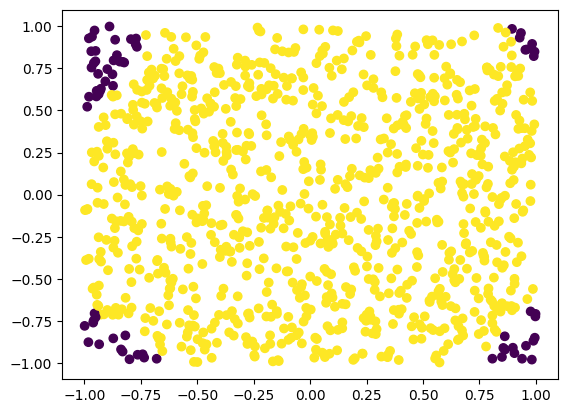

In [6]:
p = ann.eval(X)[0][1].argmax(axis=1)
plt.scatter(x=X[:,0],y=X[:,1],c=p)